In [ ]:
#Brian Lee H4
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
Description : Twitter
"""

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import metrics 
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
import pandas as pd
### ========== TODO : START ========== ###
# append you own path to the tweeter_df.txt file after "/content/drive/My Drive/"
# i.e. "/content/drive/My Drive/CM146HW4/tweets_df.txt"
tweets_df = pd.read_csv("/content/drive/My Drive/CSM146/HW4/tweets_df.txt", index_col = 0)
### ========== TODO : END ========== ###

X = tweets_df.values[:,:-2]
y = tweets_df.values[:, -2]
movies = tweets_df.values[:, -1]

train_idx = np.where((movies == 1) | (movies == 3))[0]
dev_idx   = np.where(movies == 2)[0]
test_idx  = np.where(movies == 0)[0]

X_train, X_dev, X_test = X[train_idx,], X[dev_idx,], X[test_idx,]
y_train, y_dev, y_test = y[train_idx,], y[dev_idx,], y[test_idx,]

[0.         0.7277937  0.93865031 1.         1.         1.
 1.        ]
[0.         0.         0.4537037  0.6745098  0.66929134 0.66929134
 0.66929134]


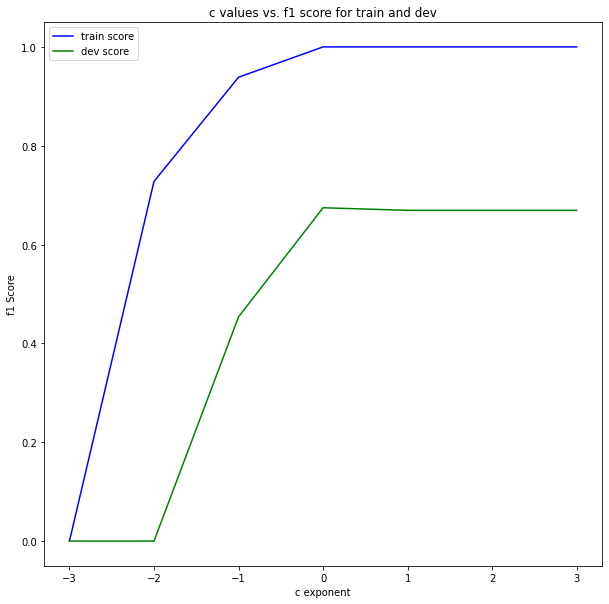

In [ ]:
### ========== TODO : START ========== ###
# part 4.1a: show the train and development set f1-score when C is set to 10^-3 10^-2 10^-1 1, 10, 100, 1000
#            This can typically be done in 20 lines or so
c_exponents = np.arange(-3,4)
train_scores = np.array(list())
dev_scores = np.array(list())
for c_exponent in c_exponents:
  model = SVC(C = np.power(10.0, c_exponent), kernel = 'linear')
  model = model.fit(X_train, y_train)

  # predict on the training data
  y_predict_train = model.predict(X_train)

  # get scores
  train_scores = np.append(train_scores, [metrics.f1_score(y_train, y_predict_train)])

  # predict on the dev data
  y_predict_dev = model.predict(X_dev)

  # get scores
  dev_scores = np.append(dev_scores, [metrics.f1_score(y_dev, y_predict_dev)])

print(train_scores)
print(dev_scores)

plt.figure(figsize=(10, 10))
plt.plot(c_exponents, train_scores, color='b', label='train score')
plt.plot(c_exponents, dev_scores, color='g', label='dev score')
plt.title('c values vs. f1 score for train and dev')
plt.xlabel('c exponent')
plt.ylabel('f1 Score')
plt.legend()
plt.show()
### ========== TODO : END ========== ###

In [ ]:
### ========== TODO : START ========== ###
# part 4.1b: select the best model based on development set f1-score 
#            retrain the model on train and dev set
#            test the final model on the test set
#            This can typically be done in 5 lines or so
X_tot = np.concatenate((X_train, X_dev))
y_tot = np.concatenate((y_train, y_dev))

# train the model with C=1
model = SVC(C=1, kernel="linear")
model = model.fit(X_tot, y_tot)

# predict on test data
y_predict = model.predict(X_test)

# score
score = metrics.f1_score(y_test, y_predict)
print(f"test f1 Score: {score}")
### ========== TODO : END ========== ###

test f1 Score: 0.8735632183908046


In [ ]:
def plot_scatter(embedding_2d, labels, show = True, save_as = None, title = None):
    """
    Visualize 2D data

    Parameters
    --------------------
        embedding_2d   -- numpy array of shape (n,2) samples
        labels         -- numpy array of shape (n,) labels
        show           -- optional boolean indicator on if display the visualziation, default set to True 
        save_as        -- optional string indicating where we should save the figure, default set to None
        title          -- optional string indicating what should be the title, default set to None
    --------------------
        None    
    """
    
    plt.scatter(embedding_2d[:,0], embedding_2d[:,1], c = labels) 
    if title is not None:
        plt.title(title)
    if save_as is not None:
        plt.savefig(save_as)
    if show:
        plt.show() 

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_embedding = pca.transform(X)

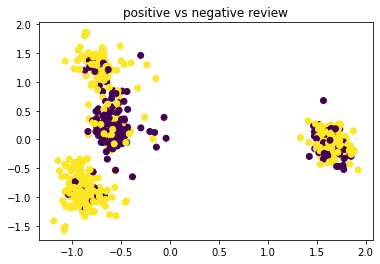

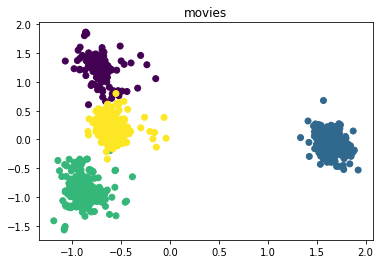

In [ ]:
### ========== TODO : START ========== ###
# part 4.2a: visualize the embedding. First color the dots by positive or negative review, then by movies 
#            This can typically be done in 2 lines or so
plot_scatter(X_embedding, y, title='positive vs negative review')
plot_scatter(X_embedding, movies, title='movies')
### ========== TODO : END ========== ###

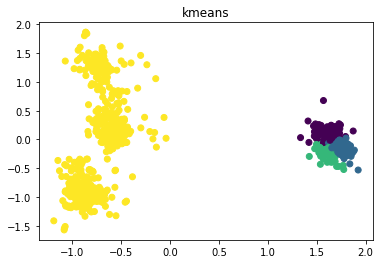

kmeans rand score: 0.25935622456493296


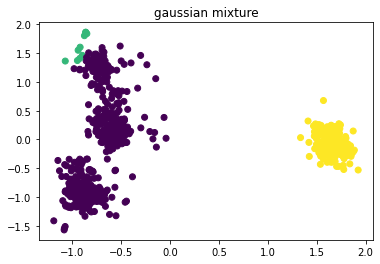

gaussian mixture rand score: 0.4189198834394529


In [ ]:
### ========== TODO : START ========== ###
# part 4.2b: First color the dots by Kmeans with 4 components, random initialization, 1 iteration, random_state = 2
#            then by GMM with 4 components, random starting point, 1 iteration and random_state = 0
#            report the adjusted rand score for both
#            This can typically be done in 10 lines or so
kmeans = KMeans(n_clusters=4, init="random", n_init=1, random_state=2)
kmeans.fit(X_embedding)
plot_scatter(X_embedding, kmeans.labels_,title='kmeans')
km_rand_score = metrics.adjusted_rand_score(movies, kmeans.labels_)
print(f'kmeans rand score: {km_rand_score}')

# GMM with 4 components, random starting point, 1 iteration and random_state = 0
gaussian_mixture = GaussianMixture(n_components=4, random_state=0, init_params='random')
gaussian_mixture.fit(X_embedding)
y_pred = gaussian_mixture.predict(X_embedding)
plot_scatter(X_embedding, y_pred,title='gaussian mixture')
gmm_rand_score = metrics.adjusted_rand_score(movies, y_pred)
print(f'gaussian mixture rand score: {gmm_rand_score}')
### ========== TODO : END ========== ###

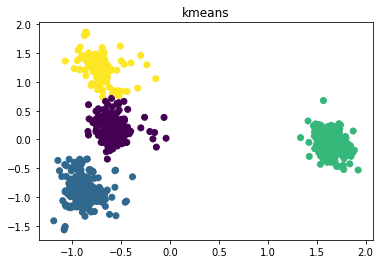

kmeans rand score: 0.9824442429232366


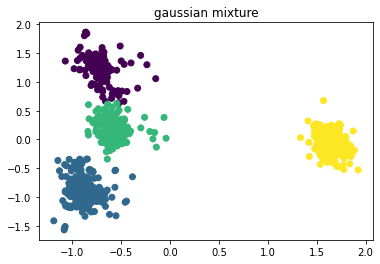

gaussian mixture rand score: 0.982486480501798


In [ ]:
### ========== TODO : START ========== ###
# part 4.2c: First color the dots by Kmeans with 4 components, random initialization, 100 iterations, random_state = 2
#            then by GMM with 4 components, random starting point, 100 iterations and random_state = 0
#            report then adjusted rand score for both
#            This can typically be done in 10 lines or so
kmeans = KMeans(n_clusters=4, init="random", n_init=100, random_state=2)
kmeans.fit(X_embedding)
plot_scatter(X_embedding, kmeans.labels_,title='kmeans')
km_rand_score = metrics.adjusted_rand_score(movies, kmeans.labels_)
print(f'kmeans rand score: {km_rand_score}')

# GMM with 4 components, random starting point, 100 iterations and random_state = 0
gaussian_mixture = GaussianMixture(n_components=4, random_state=0, init_params='random', n_init=100)
gaussian_mixture.fit(X_embedding)
y_pred = gaussian_mixture.predict(X_embedding)
plot_scatter(X_embedding, y_pred, title='gaussian mixture')
gmm_rand_score = metrics.adjusted_rand_score(movies, y_pred)
print(f'gaussian mixture rand score: {gmm_rand_score}')
### ========== TODO : END ========== ###